In [ ]:
#----------------------------------------------------------------#
import random
#To install: pip install numpy
import numpy as np
#To install: pip install matplotlib
import matplotlib.pyplot as plt
#To install: pip install torchvision
import torchvision as tv
import torchvision.transforms as transforms
#To install: pip install torch (not GPU compatible)
import torch
import torch.nn as nn
#To install: pip install Pillow
from PIL import Image
#----------------------------------------------------------------#

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     # normalization - Adjusts features so that they are on a similar scale
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_set = tv.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

test_set = tv.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

# Helps us convert numbers to labels
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
#----------------------------------------------------------------#

print(f"Train set number of images: {len(train_set)}")
print(f"Test set number of images: {len(test_set)}")
print(f"Image dimensions: {train_set[0][0].numpy().shape}")



Files already downloaded and verified
Files already downloaded and verified
Train set number of images: 50000
Test set number of images: 10000
Image dimensions: (3, 32, 32)


In [ ]:
# Creates dataloaders from the CIFAR-10 dataset
batch_size = 20
#----------------------------------------------------------------#
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size,
                                         shuffle=False, num_workers=2)
#----------------------------------------------------------------#

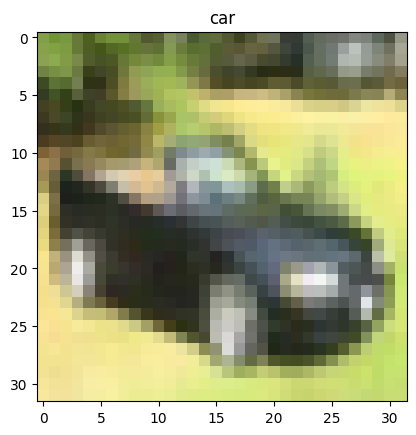

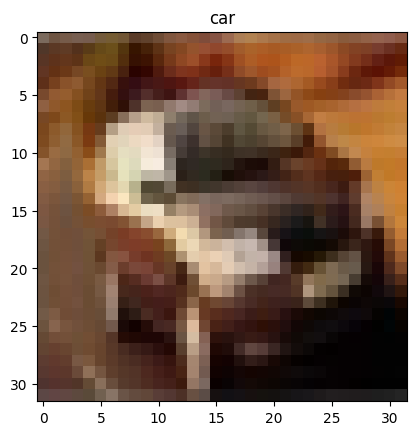

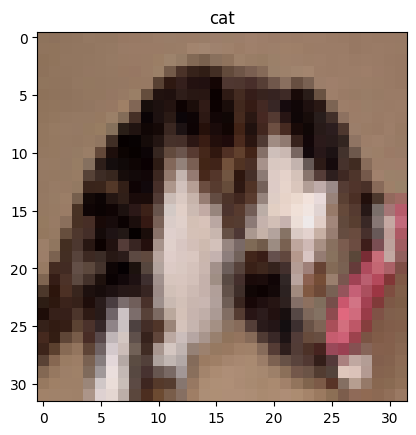

In [ ]:
# Visualizes num_to_viz digits and labels with plt.matshow and plt.show.
#----------------------------------------------------------------#
num_to_viz = 3
toPilImage = transforms.ToPILImage()

for i in range(num_to_viz):
    j = random.randrange(50000)
    # unnormalize image
    image_to_viz = toPilImage(train_set[j][0] / 2 + 0.5)
    image_to_viz_label = train_set[j][1]
    plt.imshow(image_to_viz)
    plt.title(classes[image_to_viz_label])
    plt.show()
#----------------------------------------------------------------#

In [ ]:
# Testing Deep Neural Network accuracy


class CIFAR10_DNN(nn.Module):

  def __init__(self, input_layer_size, output_layer_size, hl_A_size, hl_B_size, hl_C_size):
    super(CIFAR10_DNN, self).__init__()

    # Structure
    self.input_layer_size = input_layer_size
    self.output_layer_size = output_layer_size
    self.hl_A_size = hl_A_size
    self.hl_B_size = hl_B_size
    self.hl_C_size = hl_C_size

    # Layers
    self.l1 = nn.Linear(input_layer_size, hl_A_size)
    self.l2 = nn.Linear(hl_A_size, hl_B_size)
    self.l3 = nn.Linear(hl_B_size, hl_C_size)
    self.l4 = nn.Linear(hl_C_size, output_layer_size)

    # Activations
    self.relu = nn.ReLU()

  def forward(self, input):
    x = self.l1(input)
    x = self.relu(x)
    x = self.l2(x)
    x = self.relu(x)
    x = self.l3(x)
    x = self.relu(x)
    output = self.l4(x)
    return output

model = CIFAR10_DNN(32*32*3, 10, 350, 150, 64)




In [ ]:

#----------------------------------------------------------------#
loss_func = nn.CrossEntropyLoss() # Mean Squared Error
optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # Adaptive Optimizer
#----------------------------------------------------------------#


num_epochs = 3
n_total_steps = len(train_loader)

for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    images = images.reshape(-1, 3*32*32)
    labels = labels

    # Forward pass
    output = model(images)
    loss = loss_func(output, labels)

    # Backpropagation and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (i+1) % 100 == 0:
      print (f'Epoch [{epoch+1}/{num_epochs}], Step[{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')




/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch [1/3], Step[100/2500], Loss: 2.0392
Epoch [1/3], Step[200/2500], Loss: 2.0147
Epoch [1/3], Step[300/2500], Loss: 1.6244
Epoch [1/3], Step[400/2500], Loss: 1.6608
Epoch [1/3], Step[500/2500], Loss: 1.7830
Epoch [1/3], Step[600/2500], Loss: 1.7219
Epoch [1/3], Step[700/2500], Loss: 2.0266
Epoch [1/3], Step[800/2500], Loss: 1.1626
Epoch [1/3], Step[900/2500], Loss: 1.9405
Epoch [1/3], Step[1000/2500], Loss: 2.1000
Epoch [1/3], Step[1100/2500], Loss: 1.7508
Epoch [1/3], Step[1200/2500], Loss: 1.7962
Epoch [1/3], Step[1300/2500], Loss: 1.5217
Epoch [1/3], Step[1400/2500], Loss: 1.7279
Epoch [1/3], Step[1500/2500], Loss: 2.3986
Epoch [1/3], Step[1600/2500], Loss: 1.5174
Epoch [1/3], Step[1700/2500], Loss: 1.5827
Epoch [1/3], Step[1800/2500], Loss: 1.8601
Epoch [1/3], Step[1900/2500], Loss: 1.5845
Epoch [1/3], Step[2000/2500], Loss: 2.2179
Epoch [1/3], Step[2100/2500], Loss: 1.5729
Epoch [1/3], Step[2200/2500], Loss: 1.4521
Epoch [1/3], Step[2300/2500], Loss: 1.7144
Epoch [1/3], Step[24

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch [1/3], Step[2500/2500], Loss: 1.7140
Epoch [2/3], Step[100/2500], Loss: 1.6946
Epoch [2/3], Step[200/2500], Loss: 1.3991
Epoch [2/3], Step[300/2500], Loss: 1.3908
Epoch [2/3], Step[400/2500], Loss: 1.2296
Epoch [2/3], Step[500/2500], Loss: 1.6773
Epoch [2/3], Step[600/2500], Loss: 1.2963
Epoch [2/3], Step[700/2500], Loss: 1.2125
Epoch [2/3], Step[800/2500], Loss: 1.3284
Epoch [2/3], Step[900/2500], Loss: 1.6872
Epoch [2/3], Step[1000/2500], Loss: 1.5878
Epoch [2/3], Step[1100/2500], Loss: 1.3961
Epoch [2/3], Step[1200/2500], Loss: 1.6242
Epoch [2/3], Step[1300/2500], Loss: 1.2764
Epoch [2/3], Step[1400/2500], Loss: 1.4479
Epoch [2/3], Step[1500/2500], Loss: 1.2612
Epoch [2/3], Step[1600/2500], Loss: 1.2781
Epoch [2/3], Step[1700/2500], Loss: 1.5728
Epoch [2/3], Step[1800/2500], Loss: 0.9208
Epoch [2/3], Step[1900/2500], Loss: 1.3942
Epoch [2/3], Step[2000/2500], Loss: 1.3356
Epoch [2/3], Step[2100/2500], Loss: 1.3111
Epoch [2/3], Step[2200/2500], Loss: 1.9473
Epoch [2/3], Step[23

In [ ]:
#----------------------------------------------------------------#
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 3*32*32)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')
#----------------------------------------------------------------#

Accuracy of the network on the 10000 test images: 50.04 %


In [ ]:
# Convolutional Neural Network

class CIFAR10_CNN(nn.Module):

  def __init__(self, input_channels, output_size):
    super(CIFAR10_CNN, self).__init__()

    # Convolutional layers
    self.conv_l1 = nn.Conv2d(in_channels=input_channels, out_channels= 16, kernel_size= 5, stride=1, padding=2)
    self.conv_l2 = nn.Conv2d(in_channels=16, out_channels=40, kernel_size=5, stride=1, padding=2)
    self.conv_l3 = nn.Conv2d(in_channels=40, out_channels=80, kernel_size=5, stride=1, padding=2)


    # Feedforward layer
    self.ff1 = nn.Linear(1280, 512)
    self.ff2 = nn.Linear(512, 256)
    self.ff3 = nn.Linear(256, output_size)


    # Pooling
    self.maxpool = nn.MaxPool2d(kernel_size=2)

    # Activation functions
    self.relu = nn.ReLU()

  # Forward pass through CNN
  def forward(self, input):

    # Convolutional layers
    x = self.conv_l1(input)
    x = self.relu(x)
    x = self.maxpool(x)

    x = self.conv_l2(x)
    x = self.relu(x)
    x = self.maxpool(x)

    x = self.conv_l3(x)
    x = self.relu(x)
    x= self.maxpool(x)


    # Feedforward layers
    x = torch.flatten(x, 1)
    x = self.ff1(x)
    x = self.relu(x)

    x = self.ff2(x)
    x = self.relu(x)

    output = self.ff3(x)

    return output

cnn_model = CIFAR10_CNN(3, 10)

In [ ]:
#----------------------------------------------------------------#
loss_func = nn.CrossEntropyLoss() # Mean Squared Error
optimizer = torch.optim.Adam(cnn_model.parameters(), lr=0.0007) # Adaptive Optimizer
#----------------------------------------------------------------#


for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):

    # Forward pass
    output = cnn_model(images)
    loss = loss_func(output, labels)

    # Backpropagation and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (i+1) % 100 == 0:
      print (f'Epoch [{epoch+1}/{num_epochs}], Step[{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

Epoch [1/3], Step[100/2500], Loss: 1.9538
Epoch [1/3], Step[200/2500], Loss: 1.7736
Epoch [1/3], Step[300/2500], Loss: 1.5393
Epoch [1/3], Step[400/2500], Loss: 1.5738
Epoch [1/3], Step[500/2500], Loss: 1.4174
Epoch [1/3], Step[600/2500], Loss: 1.2502
Epoch [1/3], Step[700/2500], Loss: 1.6602
Epoch [1/3], Step[800/2500], Loss: 1.5325
Epoch [1/3], Step[900/2500], Loss: 1.1773
Epoch [1/3], Step[1000/2500], Loss: 1.2168
Epoch [1/3], Step[1100/2500], Loss: 1.2047
Epoch [1/3], Step[1200/2500], Loss: 1.3628
Epoch [1/3], Step[1300/2500], Loss: 1.6385
Epoch [1/3], Step[1400/2500], Loss: 1.3424
Epoch [1/3], Step[1500/2500], Loss: 1.1761
Epoch [1/3], Step[1600/2500], Loss: 1.3736
Epoch [1/3], Step[1700/2500], Loss: 1.4827
Epoch [1/3], Step[1800/2500], Loss: 1.1465
Epoch [1/3], Step[1900/2500], Loss: 0.9959
Epoch [1/3], Step[2000/2500], Loss: 1.3188
Epoch [1/3], Step[2100/2500], Loss: 0.7818
Epoch [1/3], Step[2200/2500], Loss: 1.0911
Epoch [1/3], Step[2300/2500], Loss: 1.0676
Epoch [1/3], Step[24

In [ ]:
#----------------------------------------------------------------#
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        outputs = cnn_model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')
#----------------------------------------------------------------#

Accuracy of the network on the 10000 test images: 70.8 %
